In [139]:
import numpy as np 
import pandas as pd

In [140]:
import os
print(os.listdir("../input"))

['slangwords', 'imdb-review-dataset']


In [141]:

df=pd.read_csv("../input/imdb-review-dataset/imdb_master.csv", encoding='latin-1', index_col = 0)

In [142]:
df.label.value_counts()

unsup    50000
pos      25000
neg      25000
Name: label, dtype: int64

In [143]:
#REMOVAL OF  ROWS WITH 'UNSUP' LABEL FROM DATAFRAME
df=df[df['label']!='unsup']

In [144]:
df.head()

,type,review,label,file
0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [145]:
# DROPPING FILE COLUMN FROM DATAFRAME
df=df.drop(['file'],axis=1)

In [146]:
df.head()

,type,review,label
0,test,Once again Mr. Costner has dragged out a movie...,neg
1,test,This is an example of why the majority of acti...,neg
2,test,"First of all I hate those moronic rappers, who...",neg
3,test,Not even the Beatles could write songs everyon...,neg
4,test,Brass pictures (movies is not a fitting word f...,neg


In [147]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [148]:
#REMOVAL OF STOP WORDS FROM MOVIE REVIEWS
stop_words = set(stopwords.words('english'))
def remove_noise(input_text):
    words = input_text.split() 
    noise_free_words = [word for word in words if word not in stop_words] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

In [149]:
df['review']=df.review.apply(remove_noise)

In [150]:
df.head()
#STOPWORDS REMOVED

,type,review,label
0,test,Once Mr. Costner dragged movie far longer nece...,neg
1,test,This example majority action films same. Gener...,neg
2,test,"First I hate moronic rappers, could'nt act gun...",neg
3,test,Not even Beatles could write songs everyone li...,neg
4,test,Brass pictures (movies fitting word them) real...,neg


In [151]:
from nltk import WordNetLemmatizer

In [152]:
# WORD LEMMATIZATION IS BETTER THAN STEMMING THE WORDS
# WORD LEMMATIZATION DONE ON MOVIE REVIEWS
lemma = nltk.WordNetLemmatizer()
def remove_redundancy(input_text):
    ex = [i.lower() for i in input_text.split()]
    lemmas = [lemma.lemmatize(i,"v") for i in ex]
    redundancy_free_text = " ".join(lemmas) 
    return redundancy_free_text

In [153]:
df['review']=df.review.apply(remove_redundancy)

In [154]:
df.head()
# AFTER LEMMATIZATION

,type,review,label
0,test,once mr. costner drag movie far longer necessa...,neg
1,test,this example majority action film same. generi...,neg
2,test,"first i hate moronic rappers, could'nt act gun...",neg
3,test,not even beatles could write songs everyone li...,neg
4,test,brass picture (movies fit word them) really so...,neg


In [155]:
#IMPORTING SLANG DOCUMENT WHICH CONTAINS SOCIAL MEDIA SLANGS AND THEIR ABBREVATIONS
#EXAMPLE : LOL - LAUGHTHER OUT LOUD
# EACH SOCIAL MEDIA SLANG IN MOVIE REVIEWS IS REPLACED BY ITS ABBREVATION
import csv
slang_data = []
with open('../input/slangwords/slang_dict.doc','rt',encoding='Cp1252') as exRtFile:
    exchReader = csv.reader(exRtFile,delimiter='`',quoting=csv.QUOTE_NONE)
    for row in exchReader:       
        slang_data.append(row)

In [158]:
#GENERATION OF lookup_dict CONSISTING OF SOCIAL MEDIA SLANGS AS KEYS  AND THEIR ABBREVEATIONS AS VALUES
slang_data=pd.DataFrame(slang_data)
lookup_dict=dict(zip(slang_data[0],slang_data[1]))

In [159]:
# EACH SOCIAL MEDIA SLANG IN MOVIE REVIEWS IS REPLACED BY ITS ABBREVATION
def lookup_words(input_text):
    words = input_text.split() 
    new_words = [] 
    for word in words:
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
        new_words.append(word) 
        new_text = " ".join(new_words) 
    return new_text

In [160]:
df['review']=df.review.apply(lookup_words)

In [162]:
# REMOVAL OF HTML TAGS IN REVIEWS
df['review']=df.review.str.replace(r'<[^>]+>','')

In [163]:
# TOKENIZING ALL REVIEWS FOR GENERATING NGRAMS
totalstr=" ".join(df['review'])
tokenized = totalstr.split()

In [164]:
# MOST FREQUENT BIGRAMS
import nltk, re, string, collections
from nltk.util import ngrams
Bigrams = ngrams(tokenized, 2)

In [165]:
BigramFreq = collections.Counter(Bigrams)



In [166]:
BigramFreq.most_common(10)

[(('i', 'think'), 9345),
 (('this', 'movie'), 5220),
 (('i', 'would'), 4066),
 (('i', 'know'), 3683),
 (('look', 'like'), 3517),
 (('i', 'saw'), 3450),
 (('i', 'find'), 3357),
 (('i', 'see'), 3268),
 (('i', 'watch'), 3218),
 (('the', 'film'), 3120)]

In [167]:
#MOST FREQUENT TRIGRAMS
trigrams = ngrams(tokenized, 3)
trigramFreq = collections.Counter(trigrams)
trigramFreq.most_common(10)

[(('Silence|', 'A', 'Trailing'), 1091),
 (('A', 'Trailing', 'Thought'), 1091),
 (('i', 'think', 'i'), 609),
 (('i', 'ever', 'seen.'), 595),
 (('!', '!', '!'), 562),
 (('i', 'saw', 'movie'), 501),
 (("i've", 'ever', 'seen.'), 461),
 (('i', 'would', 'like'), 417),
 (('i', 'first', 'saw'), 416),
 (('i', 'think', 'movie'), 413)]

In [168]:
#MOST FREQUENT QUADRIGRAMS
quadrigrams = ngrams(tokenized, 4)
quadrigramFreq = collections.Counter(quadrigrams)
quadrigramFreq.most_common(10)

[(('Silence|', 'A', 'Trailing', 'Thought'), 1091),
 (('!', '!', '!', '!'), 555),
 (('Indicating', 'a', 'spelling', 'correction'), 263),
 (('worst', 'movie', 'i', 'ever'), 166),
 (('first', 'time', 'i', 'saw'), 130),
 (('movies', 'i', 'ever', 'seen.'), 126),
 (('Denotes', 'Sarcasm|', 'Put', 'At'), 125),
 (('Sarcasm|', 'Put', 'At', 'The'), 125),
 (('Put', 'At', 'The', 'End'), 125),
 (('At', 'The', 'End', 'Of'), 125)]

In [169]:
# ENCODING LABEL VALUES "YES" TO 1 and "NO" TO 0
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['label'].unique())
df.label=le.transform(df['label'])




In [171]:
# DOLLAR SIGN IS CAUSING ENCODING PROBLEMS.HENCE I REMOVED ALL DOLLAR SIGNS IN REVIEWS
df['review']=df['review'].str.replace(r'$','')


In [ ]:
#GENERATION OF WORD VECTORS FOR ANALYZING RELATION BETWEEN THE WORDS IN THE MOVIE REVIEWS

In [172]:
# DATA SET IS HUGE.HENCE I USED ONLY THE WORDS THAT ARE REPEATED ATLEAST 3000 TIMES
from gensim.models import Word2Vec
model_viz = Word2Vec(df['review'].apply(lambda s: s.split()),min_count=3000)

In [173]:
# GENERATED 287 WORD VECTORS
word_vector=model_viz[model_viz.wv.vocab]
word_vector.shape

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(287, 100)

In [174]:
from sklearn.decomposition import PCA

In [175]:
# DID PCA TO REDUCE DIMENSION OF EACH VECTOR TO 2 VALUES
# NOW EACH VECTOR CAN BE USED AS POINT IN XY PLANE AND ALL WORDS CAN BE PLOTTED AS SCATTER PLOT
pca = PCA(n_components=2)
result = pca.fit_transform(word_vector)
result.shape

(287, 2)

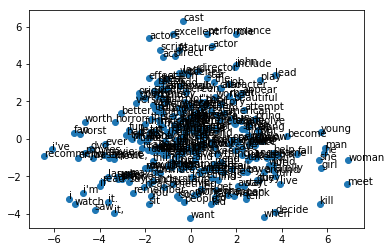

In [176]:
from matplotlib import pyplot
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_viz.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))   
pyplot.plot(figsize=(10, 8))
pyplot.show()
# WE CAN SEE THAT WORDS (MAN,WOMAN,SHE,HE,GIRL,YOUNG) HAVE A STRONG SIMILARITY AND FORMED A CLUSTER AT THE RIGHT END OF GRAPH

In [177]:
# TOP 10 SIMILAR WORDS TO WORD 'MAN' IN THE MOVIE REVIEWS
model_viz.wv.most_similar('man')

/opt/conda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('woman', 0.8038262724876404),
 ('young', 0.7145476341247559),
 ('he', 0.6408846378326416),
 ('meet', 0.6106557846069336),
 ('become', 0.5493636131286621),
 ('girl', 0.538153886795044),
 ('old', 0.5218544006347656),
 ('name', 0.5112738013267517),
 ('kill', 0.5111662149429321),
 ('lead', 0.4735769033432007)]

/opt/conda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


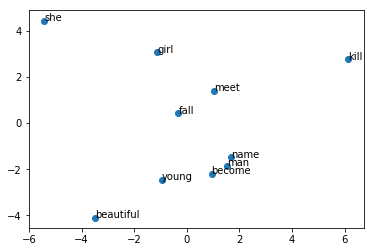

In [178]:
# SCATTER PLOT OF TOP 10 MOST SIMILAR WORDS TO WORD 'WOMAN'
words=[i[0] for i in list(model_viz.wv.most_similar('woman'))]
vectors=[model_viz[word] for word in words]
result1 = pca.fit_transform(vectors)
pyplot.scatter(result1[:, 0], result1[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result1[i, 0], result1[i, 1]))   
pyplot.plot(figsize=(10, 8))
pyplot.show()

/opt/conda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


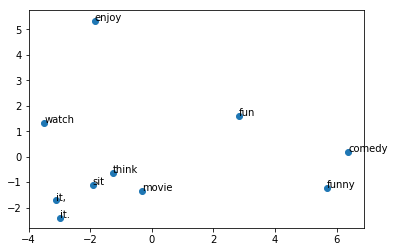

In [179]:
# SCATTER PLOT OF TOP 10 MOST SIMILAR WORDS TO WORD 'LAUGH'
words=[i[0] for i in list(model_viz.wv.most_similar('laugh'))]
vectors=[model_viz[word] for word in words]
result1 = pca.fit_transform(vectors)
pyplot.scatter(result1[:, 0], result1[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result1[i, 0], result1[i, 1]))   
pyplot.plot(figsize=(10, 8))
pyplot.show()

In [180]:
df.to_csv("imdb_filtered.csv")
df.shape

(50000, 3)

In [181]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.25)

In [ ]:
# GENERATION OF TAGGED DOCUMENTS.
# TAGGED DOCUMENTS ARE NEEDED FOR GENERATING VECTORS FOR EACH DOCUMENT


In [182]:
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from gensim.utils import simple_preprocess

def tag_docs(docs):
    tagged = docs.apply(lambda r: TaggedDocument(words=simple_preprocess(r['review']), tags=[r.label]), axis=1)
    return tagged

In [183]:
#GENERATION OF TAGGED TRAIN AND TEST SETS
tagged_train=tag_docs(train)
tagged_test=tag_docs(test)

In [184]:
tagged_train.shape

(37500,)

In [ ]:
# USED THE "tagged_train" DATASET TO TRAIN THE doc2vec_model 

In [185]:
def train_doc2vec_model(tagged_docs):
    sents = tagged_docs.values
    doc2vec_model = Doc2Vec(sents,min_count=1, window=10, size=100,sample=1e-4,workers=8,iter=20)
    return doc2vec_model


In [186]:
# USING THE "tagged_train" DATASET TO TRAIN THE doc2vec_model
model=train_doc2vec_model(tagged_train)

/opt/conda/lib/python3.6/site-packages/gensim/models/doc2vec.py:531: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/opt/conda/lib/python3.6/site-packages/gensim/models/doc2vec.py:535: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [187]:
#TRAINED doc2vec_model IS THEN USED FOR VECTORIZING EACH DOCUMENT
#infer_vector FUNCTION CONVERTS EACH DOCUMENT TO VECTOR OF X DIMENSIONS

In [188]:
def vec_for_learning(doc2vec_model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [189]:
# DOCUMENTS ARE TURNED INTO VECTORS OF X DIMENSIONS.
# THESE VECTOR VALUES CAN BE USED AS FEATURE VALUES FOR EACH DOCUMENT 
y_train, X_train = vec_for_learning(model, tagged_train)
y_test, X_test = vec_for_learning(model, tagged_test)

In [190]:
#TRAINING LOGISTIC REGRESSION MODEL ON THE DOCUMENT VECTORS GENERATED
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [191]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.83744

In [ ]:
# IF I INCREASE THE 'SIZE' PARAMETER VALUE OF DOC2Vec FUNCTION ,NO OF FEATURES OF EACH DOCUMENT WILL INCREASE
#IF FEATURES ARE INCREASED ,ACCURACY OF THE SENTIMENT ANALYSIS MODEL CAN INCREASE
#BUT MY LAPTOP IS HANGING WHEN I TRY TO DO THAT.HENCE I SETTLED AT 83 PERCENT ACCURACY
# I HAVE TO TRY OTHER MODELS LIKE TF,IDF FOR GENERATING FEATURES FROM DOCUMENTS